In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# 1. Gradient Descent

In [117]:
def f(x):
    return 0.5*x**4 - 3*x**3

In [118]:
def gd(gamma,x): 
    dx = 0.001
    df = (f(x+dx)-f(x))/dx # 기울기
    return x-gamma*df

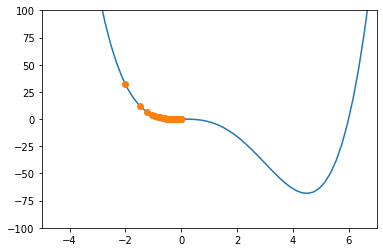

In [119]:
z = np.linspace(-10,10,100)

x0=-2
x1 = [x0]
y1 = [f(x0)]
gam=0.01

for i in range(1000):
    x0=gd(gam,x0)
    x1=np.append(x1,x0)
    y1=np.append(y1,f(x0))
    
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(z,f(z))
plt.plot(x1,y1,'o')

In [120]:
def gd1(gamma,x,b): # B 는 추진력 
    dx = 0.001
    df = (f(x+dx)-f(x))/dx # 기울기
    return x-gamma*df+b

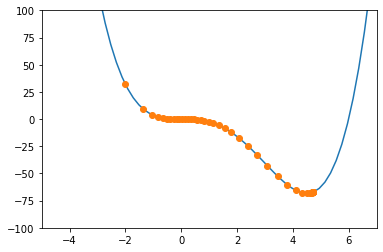

In [121]:
x0=-2
x1 = [x0]
y1 = [f(x0)]
gam=0.01

for i in range(1000):
    x0=gd1(gam,x0,0.1)
    x1=np.append(x1,x0)
    y1=np.append(y1,f(x0))
    
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(z,f(z))
plt.plot(x1,y1,'o')

# 2. Diabetes (regression)

In [68]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [69]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [67]:
diabetes=datasets.load_diabetes()

In [70]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

In [77]:
def KFC(x,y,x1): # regression
    N=len(x)
    X=sum(x)/N
    Y1=sum(y)/N
    X2=sum([i**2 for i in x])/N
    XY=sum(x*y)/N
    a2,b2=(XY-X*Y1)/(X2-X*X),(X2*Y1-X*XY)/(X2-X*X)
    return a2*x1+b2

Text(0.5, 0, 'X_p')

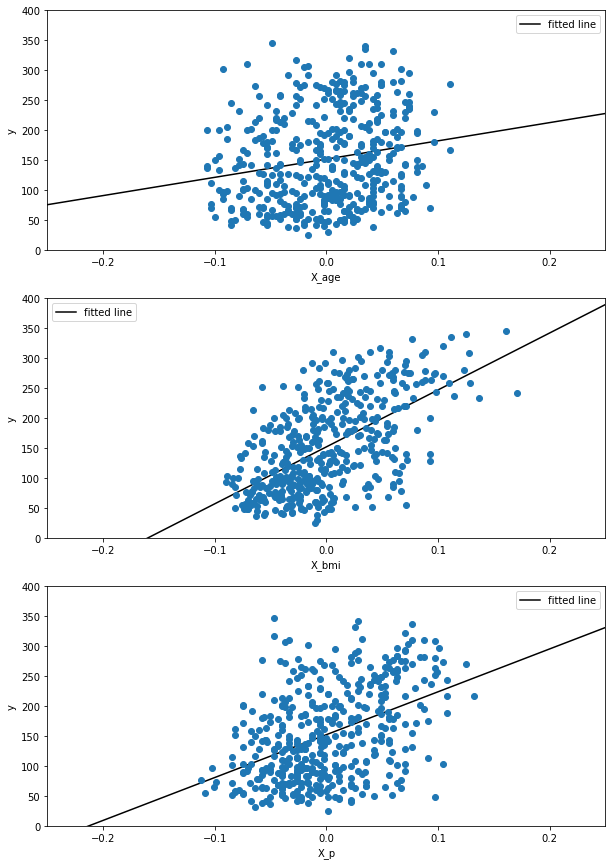

In [96]:
x=np.arange(-1,1,0.1)
plt.figure(figsize=(10,15))

plt.subplot(311)
y=KFC(X_age,Y,x)
plt.xlim(-0.25,0.25);plt.ylim(0,400);plt.xlabel('x');plt.ylabel('y')
plt.plot(x,y,'k-',label='fitted line');
plt.plot(X_age,Y,'o');
plt.legend();
plt.xlabel('X_age')

plt.subplot(312)
y1=KFC(X_bmi,Y,x)
plt.xlim(-0.25,0.25);plt.ylim(0,400);plt.xlabel('x');plt.ylabel('y')
plt.plot(x,y1,'k-',label='fitted line');
plt.plot(X_bmi,Y,'o');
plt.xlabel('X_bmi')
plt.legend();

plt.subplot(313)
y2=KFC(X_p,Y,x)
plt.xlim(-0.25,0.25);plt.ylim(0,400);plt.xlabel('x');plt.ylabel('y')
plt.plot(x,y2,'k-',label='fitted line');
plt.plot(X_p,Y,'o');
plt.legend();
plt.xlabel('X_p')


In [107]:
a = LinearRegression() # 머신러닝
a.fit(X_age.reshape(-1,1), Y)
a.fit(X_bmi.reshape(-1,1), Y)
a.fit(X_p.reshape(-1,1), Y)

LinearRegression()

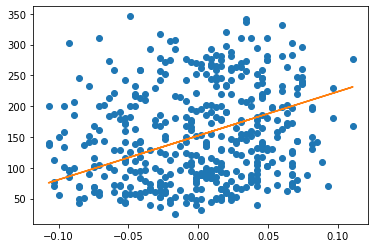

In [108]:
plt.plot(X_age, Y, 'o')
plt.plot(X_age,a.predict(X_age.reshape(-1,1)))

Text(0.5, 0, 'X_p')

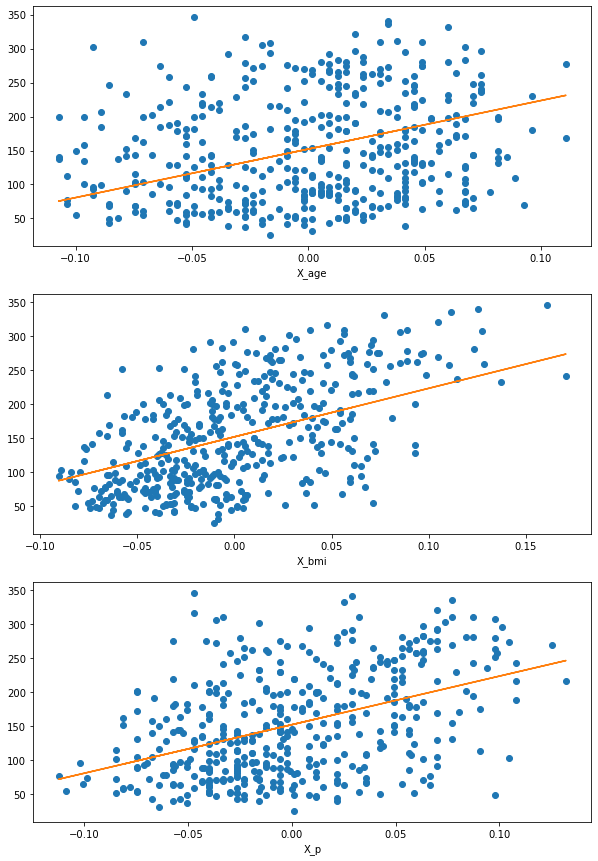

In [109]:

plt.figure(figsize=(10,15))

plt.subplot(311)
plt.plot(X_age, Y, 'o')
plt.plot(X_age,a.predict(X_age.reshape(-1,1)))
plt.xlabel('X_age')

plt.subplot(312)
plt.plot(X_bmi, Y, 'o')
plt.plot(X_bmi,a.predict(X_bmi.reshape(-1,1)))
plt.xlabel('X_bmi')

plt.subplot(313)
plt.plot(X_p, Y, 'o')
plt.plot(X_p,a.predict(X_p.reshape(-1,1)))
plt.xlabel('X_p')